# Data Exploration of Law School Admissions Bar Passage Dataset


## Description of the nootebook

In this notebook, synthetic data is generated for Law School Admissions dataset. A Law School Admissions dataset from the Law School Admissions Council (LSAC). From 1991 through 1997, LSAC tracked some twenty-seven thousand law students through law school, graduation, and sittings for bar exams. The result was the most comprehensive database that exists on the demography, experiences, and outcomes of a large cohort of aspiring lawyers. While the data has important limitations, it is a unique and very valuable source for studying a range of issues related to legal education. The dataset was originally collected for a study called 'LSAC National Longitudinal Bar Passage Study' by Linda Wightman in 1998.

##### dataset source: https://www.kaggle.com/datasets/danofer/law-school-admissions-bar-passage/data

## Table of contents

0. Import libraries and data
1. Data description
2. Data cleaning
3. Data distributions & correlations


## 0. Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('libraries imported')

libraries imported


In [2]:
#load the dataset
dataset_path = 'C:/Users/20181588/Desktop/AA SDG/synthetic-data-generation/Law School Admissions Bar Passage/Dataset/bar_pass_prediction.csv'
original_data = pd.read_csv(dataset_path)
# Make a copy of the dataset
data_full = original_data.copy()

There are many features but we will keep only the following in the upcoming exploration:

ugpa - This one stands for undergraduate gpa. Every other feature with gpa in it either perfectly correlates or perfectly negatively correlates with ugpa and this is the one I decided to keep.

decile1, decile1b, decile3 - These features represent the law school rankings by decile of each candidate in years 1 and 3 (and I’m assuming year one second semester, but I can’t be sure about that).

lsat - This feature is obviously the LSAT score of each candidate, but oddly it’s not formatted in the 120 to 180 score range of the actual LSAT. That said it has a strong correlation to whether someone passed the bar and, well, the feature is called lsat!

grad - This seems to be whether the student who took the bar exam graduated from law school. It’s a binary variable and there are very few 0s, so that makes the most sense. (Special kudos to the 65 students surveyed who didn’t graduate law school, but still managed to pass the bar!)

fulltime - Was the student a full-time student.

fam_inc - This feature is family income by quintile.

tier - What tier law school did the student attend by quintile.

race1 - Categorizes students by race. Of all the race variables this was the most complete, so it’s the one I kept. All the information contained in the other race variables are contained in race1.

sex - student gender.

pass_bar - This is the target variable. Did the student pass the bar.

## 1. Dataset description

In [3]:
# Check all columns available
data_full.columns

Index(['decile1b', 'decile3', 'ID', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'bar_passed', 'tier', 'index6040', 'indxgrp',
       'indxgrp2', 'dnn_bar_pass_prediction', 'gpa'],
      dtype='object')

In [4]:
# List of columns to keep
columns_to_keep = [
    'pass_bar',  'ugpa', 'decile1', 'decile1b',
    'decile3', 'lsat', 'grad', 'fulltime', 'fam_inc',
    'tier', 'race1', 'gender'
]



df = data_full[columns_to_keep]

In [5]:
# Check the shape and names of the columns left
print(df.shape)
print(df.columns)

(22407, 12)
Index(['pass_bar', 'ugpa', 'decile1', 'decile1b', 'decile3', 'lsat', 'grad',
       'fulltime', 'fam_inc', 'tier', 'race1', 'gender'],
      dtype='object')


## 2. Data cleaning

In [6]:
# Check how many rows with missing values are there
print(df.isnull().sum())


pass_bar       0
ugpa           0
decile1     1092
decile1b    1604
decile3     1604
lsat           0
grad           3
fulltime      34
fam_inc      289
tier          96
race1         16
gender         5
dtype: int64


In [7]:
# Inspect the dataframe
display(df.head())

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,gender
0,1,3.5,10.0,10.0,10.0,44.0,Y,1.0,5.0,4.0,white,female
1,1,3.5,5.0,5.0,4.0,29.0,Y,1.0,4.0,2.0,white,female
2,1,3.5,3.0,3.0,2.0,36.0,Y,1.0,1.0,3.0,white,male
3,1,3.5,7.0,7.0,4.0,39.0,Y,1.0,4.0,3.0,white,male
4,1,3.5,9.0,9.0,8.0,48.0,Y,1.0,4.0,5.0,white,male


In [8]:
# Remove all rows with missing values
initial_row_count = df.shape[0]
df = df.dropna()
removed_rows = initial_row_count - df.shape[0]
print(f"Removed {removed_rows} rows with missing values.")

Removed 1895 rows with missing values.


In [9]:
# Check if all the rows with missing values are removed
print(df.shape)
print(df.columns)
print(df.isnull().sum())


(20512, 12)
Index(['pass_bar', 'ugpa', 'decile1', 'decile1b', 'decile3', 'lsat', 'grad',
       'fulltime', 'fam_inc', 'tier', 'race1', 'gender'],
      dtype='object')
pass_bar    0
ugpa        0
decile1     0
decile1b    0
decile3     0
lsat        0
grad        0
fulltime    0
fam_inc     0
tier        0
race1       0
gender      0
dtype: int64


In [10]:
# Inspect the dataframe
display(df.head())

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,gender
0,1,3.5,10.0,10.0,10.0,44.0,Y,1.0,5.0,4.0,white,female
1,1,3.5,5.0,5.0,4.0,29.0,Y,1.0,4.0,2.0,white,female
2,1,3.5,3.0,3.0,2.0,36.0,Y,1.0,1.0,3.0,white,male
3,1,3.5,7.0,7.0,4.0,39.0,Y,1.0,4.0,3.0,white,male
4,1,3.5,9.0,9.0,8.0,48.0,Y,1.0,4.0,5.0,white,male


In [11]:
# Check types of columns
print(df.dtypes)

pass_bar      int64
ugpa        float64
decile1     float64
decile1b    float64
decile3     float64
lsat        float64
grad         object
fulltime    float64
fam_inc     float64
tier        float64
race1        object
gender       object
dtype: object


In [12]:
# Columns to convert to categorical
columns_to_convert = ['grad', 'race1', 'gender','decile1', 'decile1b', 'decile3', 'fulltime', 'fam_inc', 'tier']

# Convert columns to categorical
for column in columns_to_convert:
    df[column] = df[column].astype('category')

# Verify changes
print(df.dtypes)

pass_bar       int64
ugpa         float64
decile1     category
decile1b    category
decile3     category
lsat         float64
grad        category
fulltime    category
fam_inc     category
tier        category
race1       category
gender      category
dtype: object


In [13]:
# Which colums are categorical
categorical_columns = df.select_dtypes(include=['category'])
print(categorical_columns.columns)

Index(['decile1', 'decile1b', 'decile3', 'grad', 'fulltime', 'fam_inc', 'tier',
       'race1', 'gender'],
      dtype='object')


In [14]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20512 entries, 0 to 22406
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pass_bar  20512 non-null  int64   
 1   ugpa      20512 non-null  float64 
 2   decile1   20512 non-null  category
 3   decile1b  20512 non-null  category
 4   decile3   20512 non-null  category
 5   lsat      20512 non-null  float64 
 6   grad      20512 non-null  category
 7   fulltime  20512 non-null  category
 8   fam_inc   20512 non-null  category
 9   tier      20512 non-null  category
 10  race1     20512 non-null  category
 11  gender    20512 non-null  category
dtypes: category(9), float64(2), int64(1)
memory usage: 823.4 KB


In [15]:
# Statistical summary of the numerical features
df.describe()

,pass_bar,ugpa,lsat
count,20512.000000,20512.000000,20512.000000
mean,0.949152,3.212754,36.707849
std,0.219693,0.401409,5.382639
min,0.000000,1.500000,11.000000
25%,1.000000,3.000000,33.000000
50%,1.000000,3.200000,37.000000
75%,1.000000,3.500000,40.000000
max,1.000000,3.900000,48.000000


## 3. Data Distributions & Correlations

#### Data distributions

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

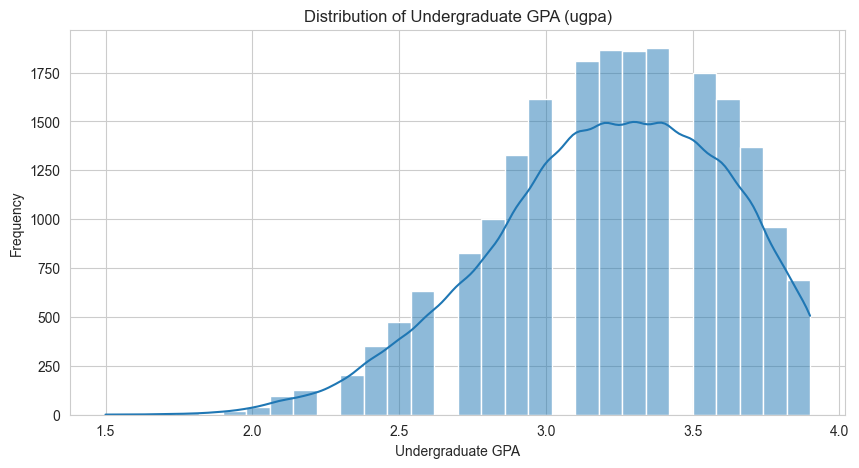

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ugpa'], kde=True, bins=30)
plt.title('Distribution of Undergraduate GPA (ugpa)')
plt.xlabel('Undergraduate GPA')
plt.ylabel('Frequency')
plt.show()

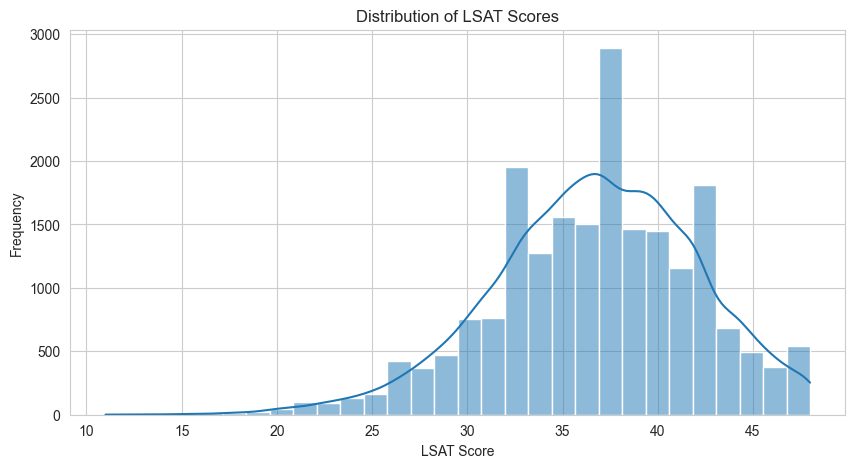

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['lsat'], kde=True, bins=30)
plt.title('Distribution of LSAT Scores')
plt.xlabel('LSAT Score')
plt.ylabel('Frequency')
plt.show()

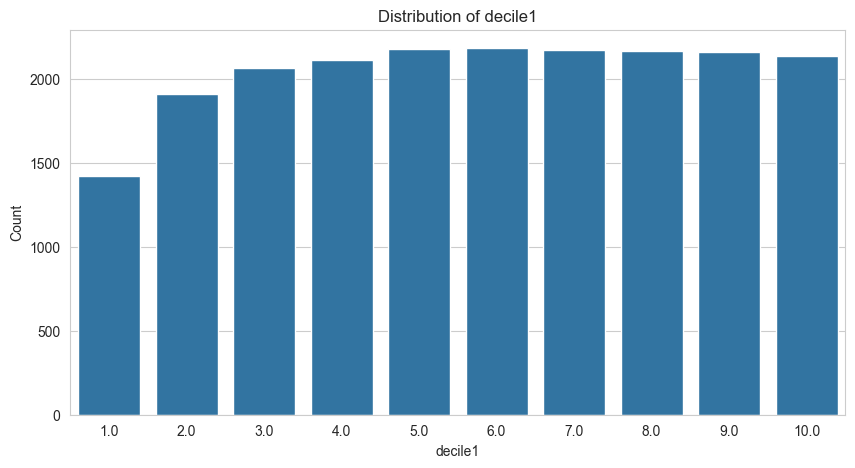

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='decile1', data=df)
plt.title('Distribution of decile1')
plt.ylabel('Count')
plt.show()


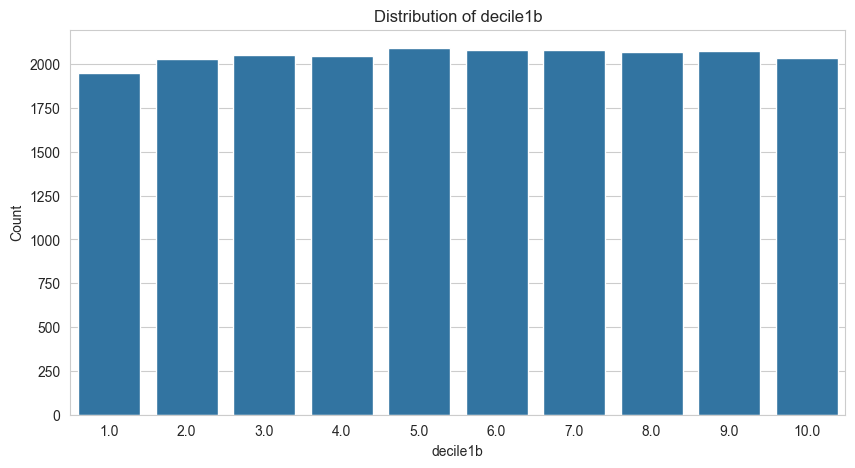

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='decile1b', data=df)
plt.title('Distribution of decile1b')
plt.ylabel('Count')
plt.show()

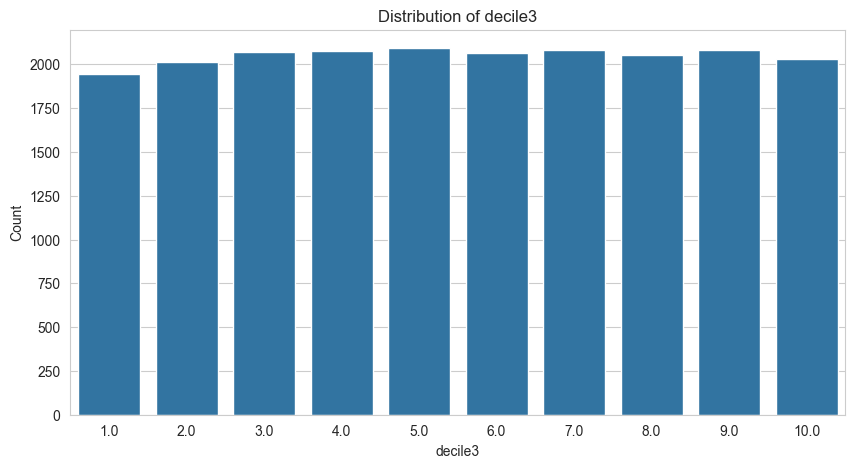

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='decile3', data=df)
plt.title('Distribution of decile3')
plt.ylabel('Count')
plt.show()

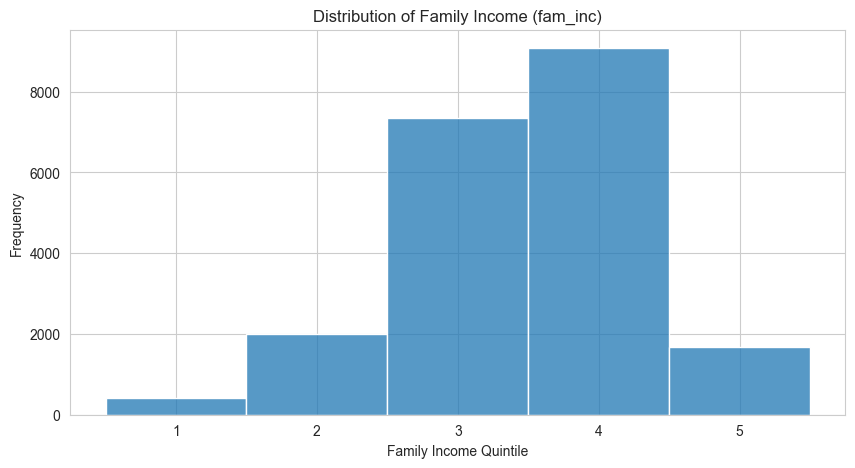

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fam_inc'], kde=False, bins=30)
plt.title('Distribution of Family Income (fam_inc)')
plt.xlabel('Family Income Quintile')
plt.ylabel('Frequency')
plt.show()

First Quintile (1.0): This is the lowest income group and represents the bottom 20% of the population in terms of income.

Second Quintile (2.0): This group is above the lowest 20% but below the median, representing families with income greater than 20% of the population but less than 40%.

Third Quintile (3.0): This is the middle income group, indicating families with income greater than 40% but less than 60% of the population, essentially the middle class.

Fourth Quintile (4.0): This quintile represents families with income greater than 60% but less than 80% of the population, typically upper-middle-class families.

Fifth Quintile (5.0): This is the highest income group, representing the top 20% of the population in terms of income.

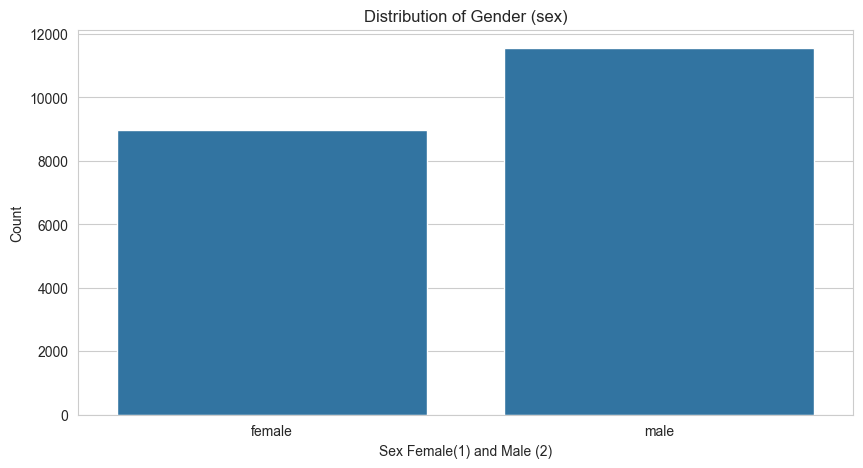

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender (sex)')
plt.xlabel('Sex Female(1) and Male (2)')
plt.ylabel('Count')
plt.show()


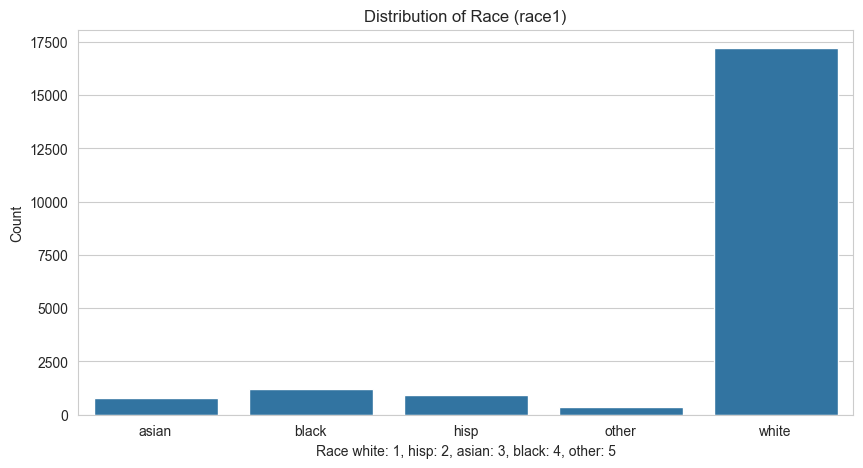

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='race1', data=df)
plt.title('Distribution of Race (race1)')
plt.xlabel('Race white: 1, hisp: 2, asian: 3, black: 4, other: 5')
plt.ylabel('Count')
plt.show()

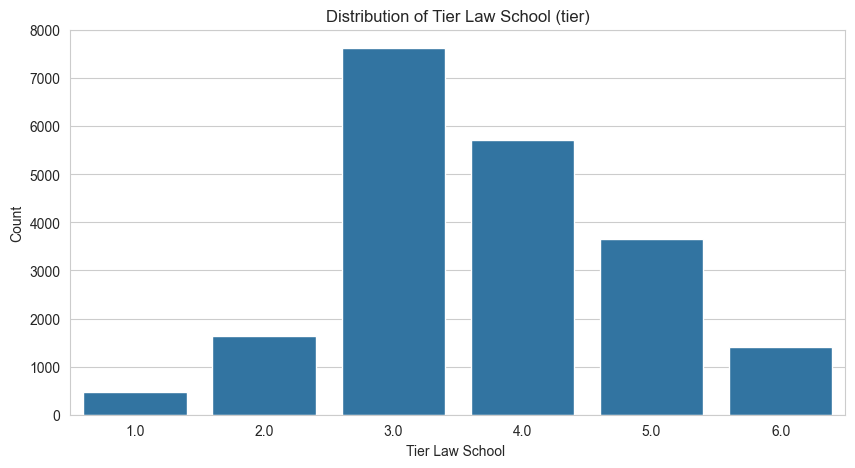

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='tier', data=df)
plt.title('Distribution of Tier Law School (tier)')
plt.xlabel('Tier Law School ')
plt.ylabel('Count')
plt.show()

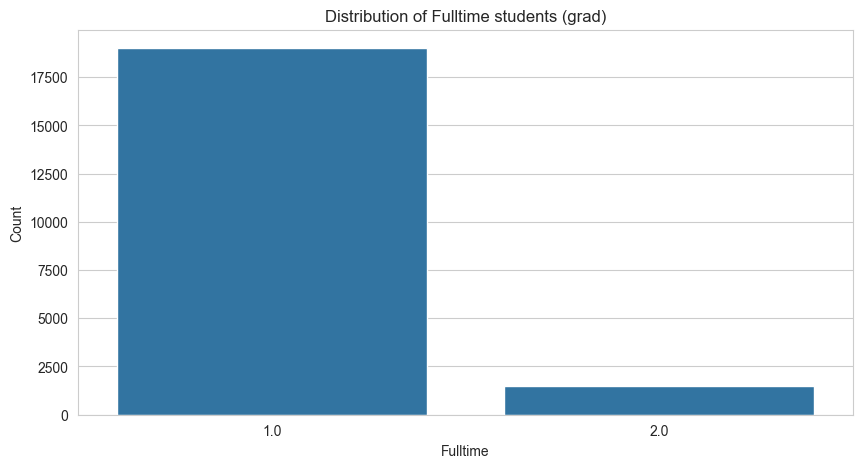

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='fulltime', data=df)
plt.title('Distribution of Fulltime students (grad)')
plt.xlabel('Fulltime')
plt.ylabel('Count')
plt.show()

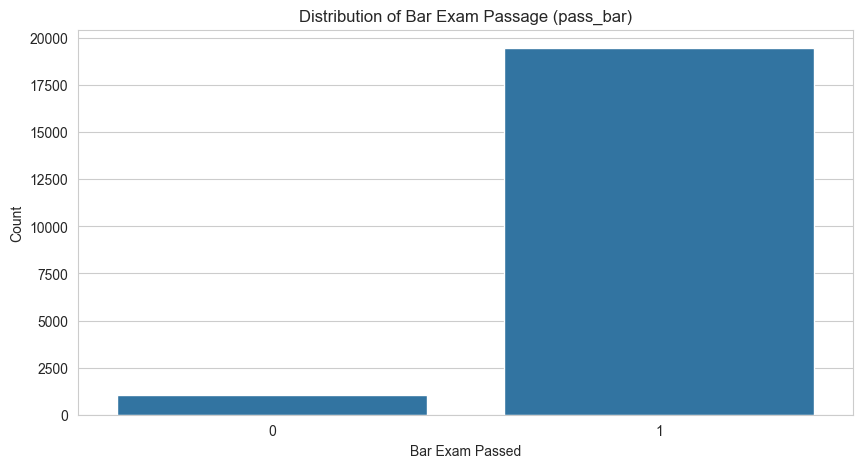

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pass_bar', data=df)
plt.title('Distribution of Bar Exam Passage (pass_bar)')
plt.xlabel('Bar Exam Passed')
plt.ylabel('Count')
plt.show()

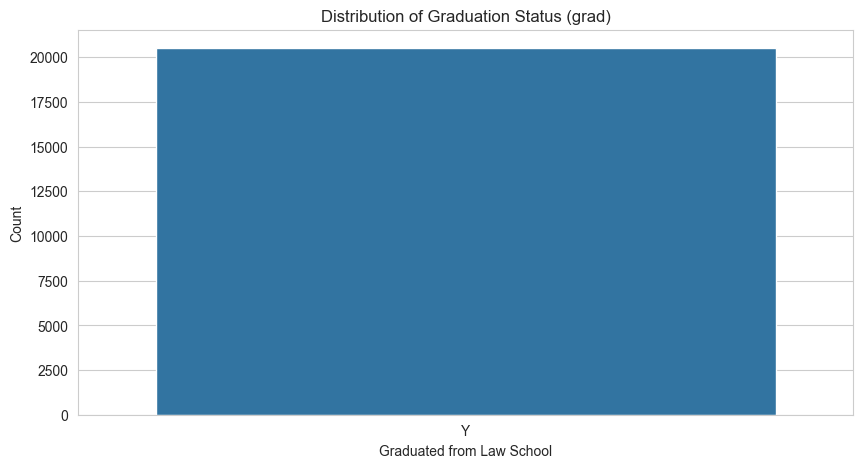

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='grad', data=df)
plt.title('Distribution of Graduation Status (grad)')
plt.xlabel('Graduated from Law School')
plt.ylabel('Count')
plt.show()

#### Data correlations

In [29]:
# Which colums are categorical
categorical_columns = df.select_dtypes(include=['category'])
print(categorical_columns.columns)

Index(['decile1', 'decile1b', 'decile3', 'grad', 'fulltime', 'fam_inc', 'tier',
       'race1', 'gender'],
      dtype='object')


In [30]:
numerical_columns = [ 'pass_bar',  'ugpa',  'lsat'] 

categorical_columns = ['decile1', 'decile1b', 'decile3', 'grad', 'fulltime', 'fam_inc', 'tier',
       'race1', 'gender']

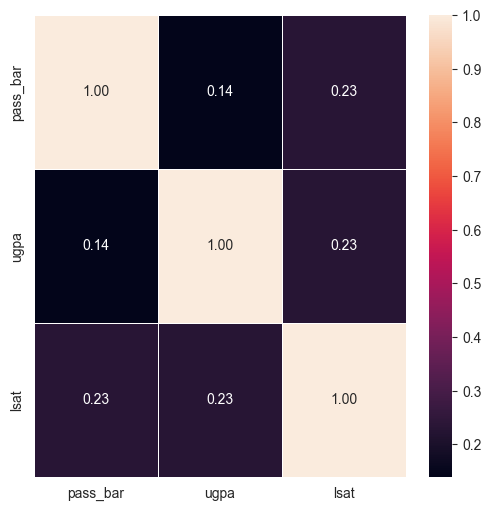

In [31]:
# Compute the correlation matrix for numerical columns only
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show()

The heatmap displays the correlation matrix for the variables pass_bar, ugpa, and lsat. At first glance, the color coding—ranging from light to dark shades—guides us through the strength of relationships between the variables. Each variable exhibits a perfect self-correlation of 1.00, which is a standard reflection of any variable correlated with itself, represented by the darkest shade on the diagonal.

Delving deeper into the off-diagonal elements, pass_bar exhibits a weak positive correlation of 0.14 with ugpa, suggesting a slight tendency for students with higher undergraduate GPAs to pass the bar exam. This relationship, though positive, indicates that ugpa alone may not be a strong predictor for passing the bar. Similarly, pass_bar shows a moderate positive correlation with lsat at 0.23. This implies a somewhat stronger relationship with LSAT scores, pointing to them as a more substantial but still not definitive indicator of bar passage likelihood.

The relationship between ugpa and lsat is moderately positive at 0.23, which may reflect a natural alignment between academic performance during undergraduate studies and the aptitude for skills assessed by the LSAT. However, like the correlations involving pass_bar, this is only a moderate link and suggests a complex interplay of factors that contribute to law school success.

In summary, while ugpa and lsat are positively associated with each other and with the likelihood of passing the bar exam, the correlations are not strong enough to make definitive predictions. These results highlight the need for a multifaceted approach when considering the determinants of bar exam success, as other unexamined factors might also play crucial roles. Additionally, these correlation coefficients serve as a reminder that while correlation can indicate an association, it does not confirm causation, and further analytical rigor is necessary to understand the underlying causal mechanisms.


In [32]:
# Import the scipy stats module for statistical functions
import scipy.stats as ss

# Define the function cramers_v to calculate the Cramér's V statistic
def cramers_v(x, y):
    # Create a contingency table from two categorical series x and y
    confusion_matrix = pd.crosstab(x, y)
    
    # Compute the Chi-squared test statistic for the contingency table
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    
    # Calculate the total number of observations from the contingency table
    n = confusion_matrix.sum().sum()
    
    # Calculate Phi-squared from the Chi-squared statistic and the total observations
    phi2 = chi2/n
    
    # Obtain the number of rows and columns from the contingency table
    r, k = confusion_matrix.shape
    
    # Apply the correction for bias in the Phi-squared value
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    
    # Correct the degrees of freedom for row and column totals
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Return the Cramér's V statistic, which is the square root of the corrected Phi-squared divided
    # by the minimum of the degrees of freedom adjusted row and column counts minus one
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage: Calculate Cramér's V between 'race1' and 'gender' columns of dataframe 'df'
cramers_v_value = cramers_v(df['race1'], df['gender'])

# Print out the Cramér's V value
print("Cramér's V value:", cramers_v_value)


Cramér's V value: 0.09846399855089526


A Cramér's V value of approximately 0.098 indicates a relatively weak association between the two categorical variables

#### Relations between catagories

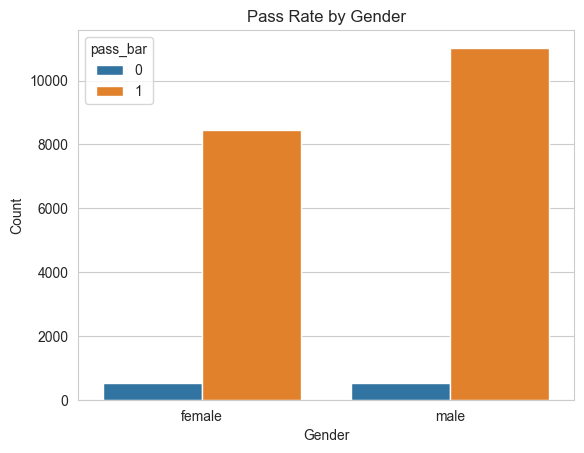

In [33]:

# Visualization of pass rate by gender
sns.countplot(x='gender', hue='pass_bar', data=df)
plt.title('Pass Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

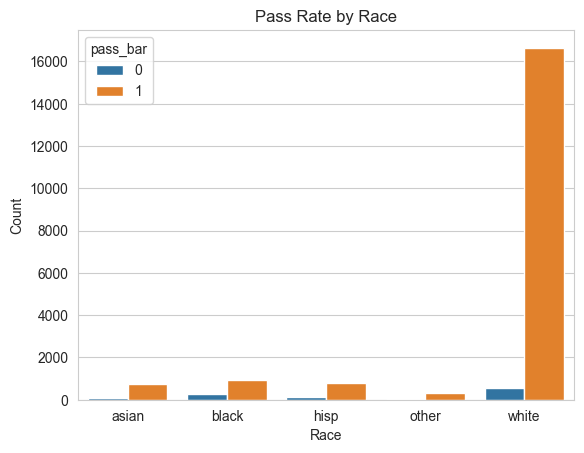

In [34]:
# Visualization of pass rate by race
sns.countplot(x='race1', hue='pass_bar', data=df)
plt.title('Pass Rate by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

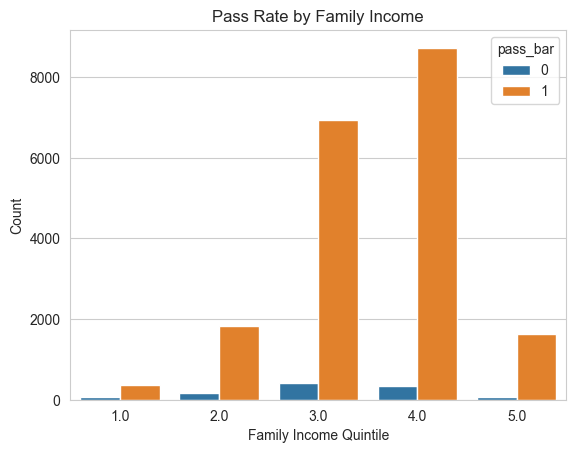

In [35]:
# Visualization of pass rate by family income
sns.countplot(x='fam_inc', hue='pass_bar', data=df)
plt.title('Pass Rate by Family Income')
plt.xlabel('Family Income Quintile')
plt.ylabel('Count')
plt.show()

In [36]:
# Statistical summary of pass rate by gender
gender_pass_rate = df.groupby('gender')['pass_bar'].mean()
print('Gender by pass rate:', gender_pass_rate)

# Statistical summary of pass rate by race
race_pass_rate = df.groupby('race1')['pass_bar'].mean()
print('Race by pass rate: ',race_pass_rate)

# Statistical summary of pass rate by family income
fam_inc_pass_rate = df.groupby('fam_inc')['pass_bar'].mean()
print('Family income by pass rate: ',fam_inc_pass_rate)

Gender by pass rate: gender
female    0.942280
male      0.954479
Name: pass_bar, dtype: float64
Race by pass rate:  race1
asian    0.923270
black    0.777038
hisp     0.876211
other    0.901333
white    0.967346
Name: pass_bar, dtype: float64
Family income by pass rate:  fam_inc
1.0    0.860577
2.0    0.915954
3.0    0.944074
4.0    0.961547
5.0    0.965558
Name: pass_bar, dtype: float64


C:\Users\20181588\AppData\Local\Temp\ipykernel_11932\1507748153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_pass_rate = df.groupby('gender')['pass_bar'].mean()
C:\Users\20181588\AppData\Local\Temp\ipykernel_11932\1507748153.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_pass_rate = df.groupby('race1')['pass_bar'].mean()
C:\Users\20181588\AppData\Local\Temp\ipykernel_11932\1507748153.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut